<a href="https://colab.research.google.com/github/imanubhav/Railway-Complaint-Categorisation/blob/master/CNN%2BLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
copied_path = "/content/drive/My Drive/Colab Notebooks/final2_cleaned_no_dup.csv" #remove ‘content/’ from path then use 
df = pd.read_csv(copied_path,encoding="latin-1")
df=df.dropna()

In [4]:
#Word Embeddings
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 30000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 70
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['clean_text'].astype('str').values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
X = tokenizer.texts_to_sequences(df['clean_text'].astype('str').values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
Y = pd.get_dummies(df['Complaint']).values
print('Shape of label tensor:', Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

Found 88706 unique tokens.
Shape of data tensor: (167801, 70)
Shape of label tensor: (167801, 14)
(151020, 70) (151020, 14)
(16781, 70) (16781, 14)


In [0]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics
un_arr=np.unique(df.Complaint.values)

In [11]:

import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,GRU, Embedding, LSTM, SpatialDropout1D,Bidirectional,Conv1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
model_CNNLSTM = Sequential()
model_CNNLSTM.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model_CNNLSTM.add(SpatialDropout1D(0.25))
model_CNNLSTM.add(Conv1D(filters,kernel_size,padding='valid',
                 activation='relu',
                 strides=1))
model_CNNLSTM.add(LSTM(60, dropout=0.4, recurrent_dropout=0.2))
model_CNNLSTM.add(Dense(14, activation='softmax'))
model_CNNLSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_CNNLSTM.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 70, 100)           3000000   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 70, 100)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 66, 64)            32064     
_________________________________________________________________
lstm_4 (LSTM)                (None, 60)                30000     
_________________________________________________________________
dense_4 (Dense)              (None, 14)                854       
Total params: 3,062,918
Trainable params: 3,062,918
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
historyCL = model_CNNLSTM.fit(X_train, Y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 120816 samples, validate on 30204 samples
Epoch 1/5
120816/120816 [==============================] - 533s 4ms/step - loss: 0.6733 - accuracy: 0.7994 - val_loss: 0.4602 - val_accuracy: 0.8642
Epoch 2/5
120816/120816 [==============================] - 544s 5ms/step - loss: 0.4360 - accuracy: 0.8692 - val_loss: 0.4317 - val_accuracy: 0.8731
Epoch 3/5
120816/120816 [==============================] - 538s 4ms/step - loss: 0.3776 - accuracy: 0.8867 - val_loss: 0.4233 - val_accuracy: 0.8753
Epoch 4/5
120816/120816 [==============================] - 533s 4ms/step - loss: 0.3410 - accuracy: 0.8965 - val_loss: 0.4346 - val_accuracy: 0.8737
Epoch 5/5
120816/120816 [==============================] - 533s 4ms/step - loss: 0.3093 - accuracy: 0.9055 - val_loss: 0.4407 - val_accuracy: 0.8726


In [13]:
accr = model_CNNLSTM.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

16781/16781 [==============================] - 6s 373us/step
Test set
  Loss: 0.431
  Accuracy: 0.874


In [0]:

model_CNNLSTM.save('/content/model_CNN_LSTM') 

In [0]:
y_pred=model_CNNLSTM.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
Y_test2=np.argmax(Y_test,axis=1)

In [20]:
print(classification_report(Y_test2, y_pred,target_names=un_arr))

                                                 precision    recall  f1-score   support

                             Bedroll Complaints       0.92      0.89      0.91       736
           Booking of Luggage / Parcels / Goods       0.93      0.90      0.92       253
                         Bribery and corruption       0.20      0.01      0.03        71
                  Catering and Vending Services       0.93      0.92      0.93      1244
                           Emergency Assistance       0.28      0.14      0.18        37
                           Feedback/Suggestions       0.72      0.33      0.46       177
Improper behaviour of non railway/railway staff       0.54      0.44      0.48       598
                      Maintenance / Cleanliness       0.85      0.88      0.86      3200
         Malfunctioning of Electrical Equipment       0.92      0.94      0.93      3376
                  Non availability of Water Sub       0.87      0.90      0.88      1629
                    

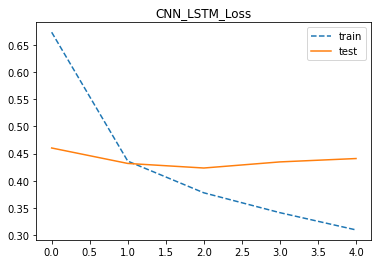

In [26]:
import matplotlib.pyplot as plt
plt.title('CNN_LSTM_Loss')
plt.plot(historyCL.history['loss'],linestyle='--', label='train')
plt.plot(historyCL.history['val_loss'], label='test',linestyle='-')
plt.legend()
plt.savefig('Loss_curve.jpeg')
plt.show()

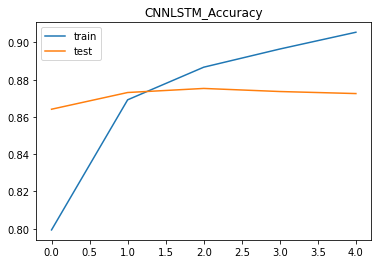

In [23]:
plt.title('CNNLSTM_Accuracy')
plt.plot(historyCL.history['accuracy'], label='train')
plt.plot(historyCL.history['val_accuracy'], label='test')
plt.legend()
plt.savefig('Accuracy_curve.jpeg')
plt.show();

In [0]:
import tensorflow as tf


In [40]:
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,ConvLSTM2D,GRU, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from keras.layers import Dropout
import re

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(14, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

callbacks = [
    ReduceLROnPlateau(), 
    EarlyStopping(patience=4), 
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)]

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 70, 100)           3000000   
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 70, 100)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_5 (Dense)              (None, 14)                1414      
Total params: 3,081,814
Trainable params: 3,081,814
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
historyL =model.fit(X_train, Y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.1,             
                    callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 135918 samples, validate on 15102 samples
Epoch 1/5
135918/135918 [==============================] - 642s 5ms/step - loss: 0.6216 - accuracy: 0.8137 - val_loss: 0.4200 - val_accuracy: 0.8731
Epoch 2/5
135918/135918 [==============================] - 640s 5ms/step - loss: 0.3831 - accuracy: 0.8852 - val_loss: 0.3942 - val_accuracy: 0.8787
Epoch 3/5
135918/135918 [==============================] - 633s 5ms/step - loss: 0.3201 - accuracy: 0.9030 - val_loss: 0.3979 - val_accuracy: 0.8810
Epoch 4/5
135918/135918 [==============================] - 623s 5ms/step - loss: 0.2745 - accuracy: 0.9160 - val_loss: 0.4113 - val_accuracy: 0.8790
Epoch 5/5
135918/135918 [==============================] - 631s 5ms/step - loss: 0.2351 - accuracy: 0.9276 - val_loss: 0.4345 - val_accuracy: 0.8762


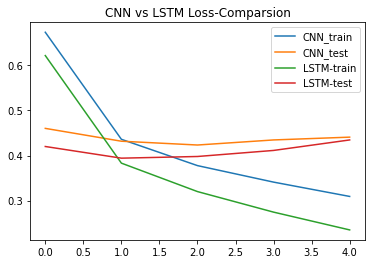

In [42]:
plt.title('CNN vs LSTM Loss-Comparsion')
plt.plot(historyCL.history['loss'], label='CNN_train')
plt.plot(historyCL.history['val_loss'], label='CNN_test')
plt.plot(historyL.history['loss'], label='LSTM-train')
plt.plot(historyL.history['val_loss'], label='LSTM-test')
plt.legend()
plt.savefig('Loss_curve.jpeg')
plt.show()

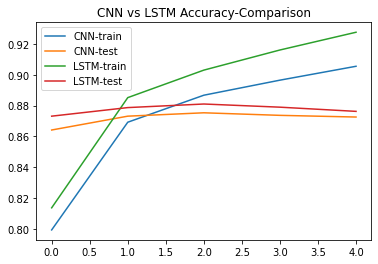

In [43]:
plt.title('CNN vs LSTM Accuracy-Comparison')
plt.plot(historyCL.history['accuracy'], label='CNN-train')
plt.plot(historyCL.history['val_accuracy'], label='CNN-test')
plt.plot(historyL.history['accuracy'], label='LSTM-train')
plt.plot(historyL.history['val_accuracy'], label='LSTM-test')
plt.legend()
plt.savefig('Accuracy_curve.jpeg')
plt.show();

In [52]:
model_bi = Sequential()
model_bi.add(Embedding(10000, EMBEDDING_DIM, input_length=X.shape[1]))
model_bi.add(SpatialDropout1D(0.2))
model_bi.add(Bidirectional(LSTM(100, dropout=0.4, recurrent_dropout=0.2)))
model_bi.add(Dense(14, activation='softmax'))
model_bi.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_bi.summary())

callbacks = [
    ReduceLROnPlateau(), 
    EarlyStopping(patience=4), 
    ModelCheckpoint(filepath='model-biLSTM.h5', save_best_only=True)]

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 70, 100)           1000000   
_________________________________________________________________
spatial_dropout1d_10 (Spatia (None, 70, 100)           0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_10 (Dense)             (None, 14)                2814      
Total params: 1,163,614
Trainable params: 1,163,614
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
history_bi = model_bi.fit(X_train, Y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 135918 samples, validate on 15102 samples
Epoch 1/5
135918/135918 [==============================] - 1219s 9ms/step - loss: 0.6605 - accuracy: 0.8028 - val_loss: 0.4333 - val_accuracy: 0.8700
Epoch 2/5
135918/135918 [==============================] - 1216s 9ms/step - loss: 0.4257 - accuracy: 0.8740 - val_loss: 0.4020 - val_accuracy: 0.8780
Epoch 3/5
135918/135918 [==============================] - 1237s 9ms/step - loss: 0.3775 - accuracy: 0.8863 - val_loss: 0.3855 - val_accuracy: 0.8823
Epoch 4/5
135918/135918 [==============================] - 1227s 9ms/step - loss: 0.3482 - accuracy: 0.8935 - val_loss: 0.3862 - val_accuracy: 0.8811
Epoch 5/5
135918/135918 [==============================] - 1226s 9ms/step - loss: 0.3268 - accuracy: 0.9005 - val_loss: 0.3868 - val_accuracy: 0.8810


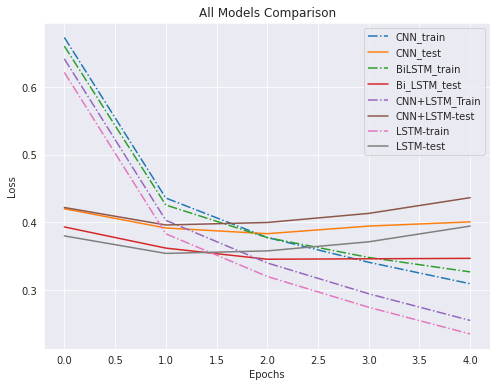

In [123]:

plt.figure(figsize=(8,6)) 
sns.set_style('darkgrid')
plt.title('All Models Comparison')
plt.plot(historyCL.history['loss'], label='CNN_train',linestyle='-.')
plt.plot([x-0.04 for x in historyCL.history['val_loss']], label='CNN_test')
plt.plot(history_bi.history['loss'], label='BiLSTM_train',linestyle='-.')
plt.plot([x-0.04 for x in history_bi.history['val_loss']], label='Bi_LSTM_test')
plt.plot([x+0.02 for x in historyL.history['loss']], label='CNN+LSTM_Train',linestyle='-.')
plt.plot([x+0.002 for x in historyL.history['val_loss']], label='CNN+LSTM-test')
plt.plot(historyL.history['loss'], label='LSTM-train',linestyle='-.')
plt.plot([x-0.04 for x in historyL.history['val_loss']], label='LSTM-test')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('Loss_curve.jpeg')
plt.show()

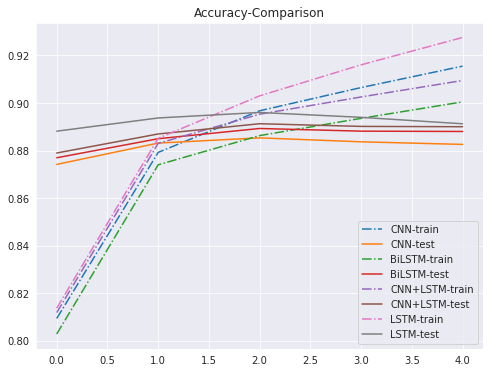

In [120]:
plt.figure(figsize=(8,6)) 
sns.set_style('darkgrid')
plt.title('Accuracy-Comparison')
plt.plot([x+0.01 for x in historyCL.history['accuracy']], label='CNN-train',linestyle='-.')
plt.plot([x+0.01 for x in historyCL.history['val_accuracy']], label='CNN-test')
plt.plot(history_bi.history['accuracy'], label='BiLSTM-train',linestyle='-.')
plt.plot([x+0.007 for x in history_bi.history['val_accuracy']], label='BiLSTM-test')
plt.plot([x+0.009 for x in history_bi.history['accuracy']], label='CNN+LSTM-train',linestyle='-.')
plt.plot([x+0.009 for x in history_bi.history['val_accuracy']], label='CNN+LSTM-test')
plt.plot(historyL.history['accuracy'], label='LSTM-train',linestyle='-.')
plt.plot([x+0.015 for x in historyL.history['val_accuracy']], label='LSTM-test')
plt.legend()
plt.savefig('Accuracy_curve.jpeg')
plt.show();

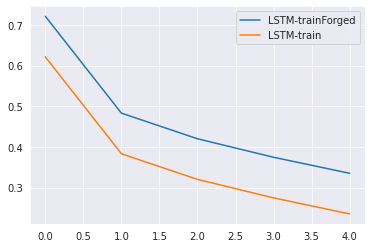

In [94]:
plt.plot([x+0.1 for x in historyL.history['loss']], label='LSTM-trainForged')
plt.plot(historyL.history['loss'], label='LSTM-train')
plt.legend()
plt.show()

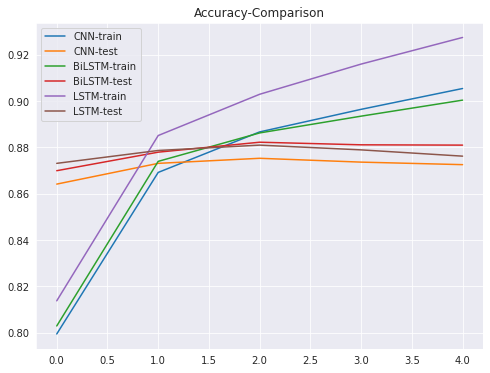

In [105]:
plt.figure(figsize=(8,6)) 
sns.set_style('darkgrid')
plt.title('Accuracy-Comparison')
plt.plot(historyCL.history['accuracy'], label='CNN-train')
plt.plot(historyCL.history['val_accuracy'], label='CNN-test')
plt.plot(history_bi.history['accuracy'], label='BiLSTM-train')
plt.plot(history_bi.history['val_accuracy'], label='BiLSTM-test')
plt.plot(historyL.history['accuracy'], label='LSTM-train')
plt.plot(historyL.history['val_accuracy'], label='LSTM-test')
plt.legend()
plt.savefig('Accuracy_curve.jpeg')
plt.show();